# Titanic Data Analysis
#### by SUPADIT W. (MINK)

***

# Step 1 : Reading the Data

In [1]:
# Import libraries for easier life
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno

In [2]:
# Import csv for analysis
df = pd.read_csv('./train.csv')
# Sneak peek on first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


peak a boo!

In [3]:
# find out number of (row, columns)
df.shape

(891, 12)

In [4]:
#list of columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# info of the dataset
df.info(memory_usage='deep')
# As an a-little-more sophisticated DataScientist 
# I used memory_usage='deep' to find out file size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB


In [6]:
# view some statistical value from dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Step 2: Cleaning the Data

In [7]:
# find numbers of null
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<span style='background:yellow'>\
-Age column is missing 177 rows\
-Cabin column is missing 687 rows\
-Embarked column is missing 2 rows
</span>    

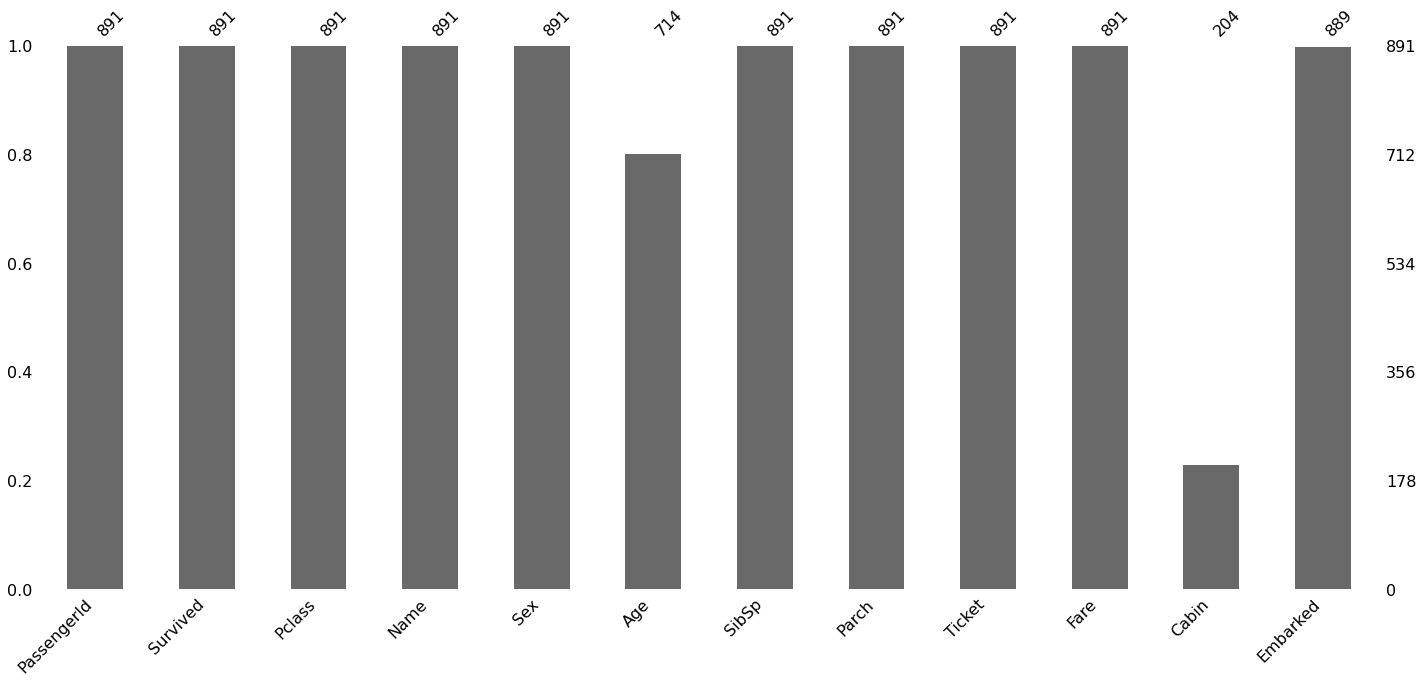

In [8]:
# use missingno as the Readme suggested. TeeHee!
msno.bar(df);

<span style='background:yellow'> Barchart shown Age column and Cabin column are missing some values (especially Cabin) </span>

In [9]:
# Delete empty rows in Embarked column
df.dropna(subset=['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<span style='background:yellow'>There are 891 from the start, now we got 889</span>

In [10]:
# Replace empty cabin with ¯\\_(ツ)_/¯
df['Cabin'] = df['Cabin'].fillna(r'¯\\_(ツ)_/¯')
df.head()
# meh

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\\_(ツ)_/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\\_(ツ)_/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\\_(ツ)_/¯,S


# Step3: Feature Extraction

In [11]:
# Sum up family members
df['FamilyCount'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\\_(ツ)_/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\\_(ツ)_/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\\_(ツ)_/¯,S,0


In [12]:
# Find reverends in the crew ✞.

def reverend(value):
    """This is my first docstring, YeeHaa!
       this function will find 'Rev' in name column
       if, there is 'Rev' in there name, returns 1
       if not, returns 0
    """
    strings = value.split()
    if 'Rev.' in str(strings):
        return 1
    else:
        return 0
    
# Create new column for reverend and apply reverend() function    
df['reverend'] = df['Name'].apply(reverend)

# Shows reverend data rows
df[df["reverend"]== 1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,reverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\\_(ツ)_/¯,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\\_(ツ)_/¯,S,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\\_(ツ)_/¯,S,1,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\\_(ツ)_/¯,Q,0,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\\_(ツ)_/¯,S,1,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\\_(ツ)_/¯,S,0,1


<span style='background:yellow'> Might check on 'Goodness vs. Lifespan' later.</span> 

In [13]:
# Create three columns of Embarked_C, Embarked_Q, and Embarked_S
# using pd.get_dummies()

pd.get_dummies(df, columns=['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,reverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\\_(ツ)_/¯,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\\_(ツ)_/¯,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\\_(ツ)_/¯,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\\_(ツ)_/¯,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\\_(ツ)_/¯,3,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0,0,1,0,0


In [14]:
# Did the same thing with column 'Sex'
pd.get_dummies(df, columns=['Sex'])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,reverend,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\\_(ツ)_/¯,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\\_(ツ)_/¯,S,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\\_(ツ)_/¯,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,¯\\_(ツ)_/¯,S,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,¯\\_(ツ)_/¯,S,3,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,0,0,0,1


In [15]:
# Extract titles and put then in new column called Titles 
df['Titles'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Create dummies columns
pd.get_dummies(df, columns=['Titles'])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Titles_Major,Titles_Master,Titles_Miss,Titles_Mlle,Titles_Mme,Titles_Mr,Titles_Mrs,Titles_Ms,Titles_Rev,Titles_Sir
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,0,0,0,0,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,1,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,0,1,0,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,0,0,0,1,0,0,0,0


# Step 4: Exploratory analysis

### 1.Overall Survival rate

In [16]:
# Calculate overall survival rate with .mean() 
osr = round(df['Survived'].mean()*100, 2)

print(f"The overall survival rate is {osr}%." )

The overall survival rate is 38.38%.


### 2. Which gender fared the worst? What was their survival rate?

In [17]:
# Using groupby to filter out male and female survival rate
df.groupby(['Sex'])['Survived'].mean().round(2)

Sex
female    0.74
male      0.19
Name: Survived, dtype: float64

<span style='background:yellow'> Ladies be like --> Good luck with your 19% dude  </span> 

### 3. What was the survival rate for each Pclass?


In [18]:
df.groupby(['Pclass'])['Survived'].mean().round(2)

Pclass
1    0.63
2    0.47
3    0.24
Name: Survived, dtype: float64

<span style='background:yellow'> Planning on increasing income for survival rate  </span> 

### 4. Did any reverends survive? How many?

In [19]:
count = (df['reverend'] == 1).sum()
print(f'There are {count} reverends on board.')

There are 6 reverends on board.


In [20]:
df.groupby(['reverend'])['Survived'].mean().round(2)

reverend
0    0.39
1    0.00
Name: Survived, dtype: float64

<span style='background:yellow'> None of them survived. ✞  </span> 

### 5. What is the survival rate for cabins marked ¯\(ツ)/¯


In [21]:
df.groupby(['Cabin'])['Survived'].mean().round(2)

Cabin
A10           0.0
A14           0.0
A16           1.0
A19           0.0
A20           1.0
             ... 
F38           0.0
F4            1.0
G6            0.5
T             0.0
¯\\_(ツ)_/¯    0.3
Name: Survived, Length: 148, dtype: float64

<span style='background:yellow'> 30% is not that bad comparing to male survival rate of 19%  </span> 

### 6. What is the survival rate for people whose Age is empty?

In [22]:
# Check numbers of empty age rows 
df['Age'].isnull().sum()

177

In [23]:
# Replace special character for value tracking
df['Age'] = df['Age'].fillna(r'ಠ^ಠ')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,reverend,Titles
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,¯\\_(ツ)_/¯,S,0,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,ಠ^ಠ,1,2,W./C. 6607,23.45,¯\\_(ツ)_/¯,S,3,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,0,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,¯\\_(ツ)_/¯,Q,0,0,Mr


In [24]:
df.groupby(['Age'])['Survived'].mean().round(2)

Age
0.42    1.00
0.67    1.00
0.75    1.00
0.83    1.00
0.92    1.00
        ... 
70.5    0.00
71.0    0.00
74.0    0.00
80.0    1.00
ಠ^ಠ     0.29
Name: Survived, Length: 89, dtype: float64

<span style='background:yellow'> 29% survival rate for those who don't have their age marked down </span>\
<b>Looks like that emoji typo is looking into my soul</b>

### 7. What is the survival rate for each port of embarkation?

In [25]:
# Make use of .get_dummies
df_new = pd.get_dummies(df, columns=['Embarked'])

#Calculate three of it all at once
df_new.groupby(['Embarked_C','Embarked_Q','Embarked_S'])['Survived'].mean().round(2)

Embarked_C  Embarked_Q  Embarked_S
0           0           0             1.00
                        1             0.34
            1           0             0.39
1           0           0             0.55
Name: Survived, dtype: float64

<span style='background:yellow'> 
    Embarked_C:55% || Embarked_Q:39% || Embarked_S:34% 
 </span>

### 8. What is the survival rate for children (under 12) in each Pclass?

In [26]:
# Import the csv file again
# because of the mess we made from the above
df = pd.read_csv('./train.csv')

# Now Age column is now float again and ready for calculation 
df.groupby([(df['Age']<12), "Pclass"])["Survived"].mean().round(2)

Age    Pclass
False  1         0.63
       2         0.42
       3         0.23
True   1         0.75
       2         1.00
       3         0.40
Name: Survived, dtype: float64

<span style='background:yellow'> 
    Pclass_1 : 75% (of course) || Pclass_2 : 100% (didn't expect that) || Pclass_3 : 40% (probably)  
 </span>

### 9. Did the captain of the ship survive? Is he on the list?

In [27]:
# Checking for title for Captain
df['Titles'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.get_dummies(df, columns=['Titles']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Titles_Capt',
       'Titles_Col', 'Titles_Countess', 'Titles_Don', 'Titles_Dr',
       'Titles_Jonkheer', 'Titles_Lady', 'Titles_Major', 'Titles_Master',
       'Titles_Miss', 'Titles_Mlle', 'Titles_Mme', 'Titles_Mr', 'Titles_Mrs',
       'Titles_Ms', 'Titles_Rev', 'Titles_Sir'],
      dtype='object')

In [28]:
df.groupby([(df['Titles'] == 'Capt')])["Survived"].mean().round(2)

Titles
False    0.38
True     0.00
Name: Survived, dtype: float64

<span style='background:yellow'> 
   Captain went down with his ship just like in the movie. Salute! Captain Edward Smith.
 </span>

### 10. Of all the people that died, who had the most expensive ticket? How much did it cost? 

In [29]:
df.groupby(["Survived"])["Fare"].max()

Survived
0    263.0000
1    512.3292
Name: Fare, dtype: float64

In [30]:
df.loc[df['Fare'] == 263]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,Mr
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,Miss
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,Miss
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,Mr


<span style='background:yellow'> 
   Men in Fortune family didn't make it
 </span>

### 11. Does having family on the boat help or hurt your chances of survival?

In [31]:
df.groupby(["Parch"])["Survived"].mean().round(2)

Parch
0    0.34
1    0.55
2    0.50
3    0.60
4    0.00
5    0.20
6    0.00
Name: Survived, dtype: float64

<span style='background:yellow'> 
   From the data above, havaing family members help increase chance of survival, but not too much members
 </span>

# Step 5: Plotting

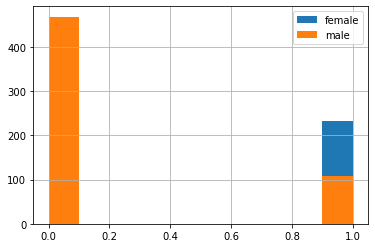

In [32]:
# Find out surival rate in each gender
df.groupby(['Sex'])['Survived'].hist(legend=True);

<span style='background:yellow'> 
   Many men died by that incident 
</span>

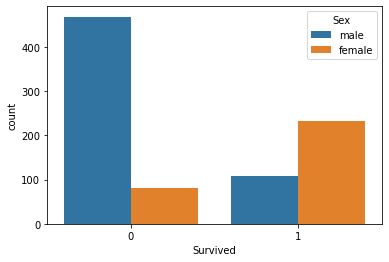

In [33]:
# make the graph more clean and pretty with seaborn
sns.countplot(x='Survived', hue='Sex', data = df);

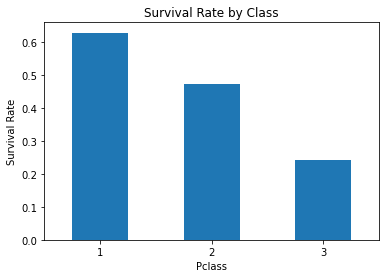

In [34]:
survived_by_class = df.groupby('Pclass')['Survived'].mean()

fig, ax = plt.subplots()

ax = survived_by_class.plot.bar(title='Survival Rate by Class')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=0)

plt.show();

<span style='background:yellow'> 
   Gonna work harder for better income 
</span>


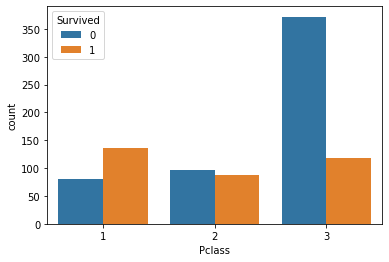

In [35]:
# make the graph more clean and pretty with seaborn
sns.countplot(x ='Pclass', hue='Survived', data = df);

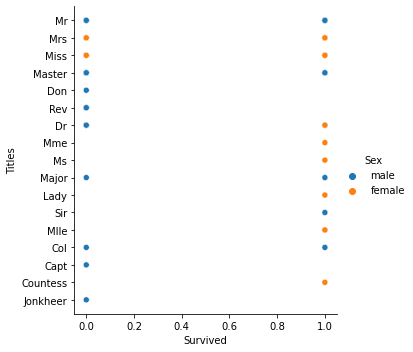

In [36]:
sns.relplot(x='Survived', y='Titles', data=df, hue='Sex');

<span style='background:yellow'> 
   Everyone with title Mme, Ms, Lady, Sir, Mlle, and Countess survived. Planning on increasing fame and power aside from money.
</span>

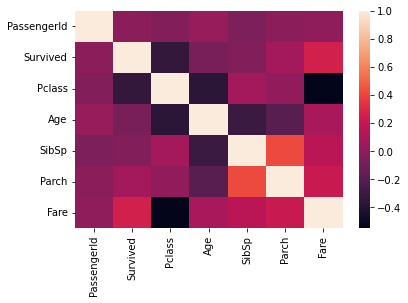

In [37]:
sns.heatmap(df.corr());

<span style='background:yellow'> 
   Spouses/siblings and Family have high correlation with survival. Planning on getting my girlfriend pregnant.
</span>

### After exploration for every factors that might increase my survival rate, I have a conclusion.
### I need to be Rich, Famous/Powerful, and punch a hole in my condom.

    

# Bonus Step : Pollen over Flower Petals

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


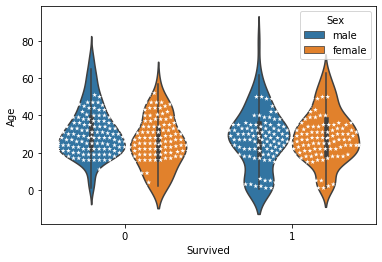

In [38]:
sns.violinplot(x='Survived', y = 'Age', hue='Sex', legend=True, data=df);
sns.swarmplot(x='Survived', y = 'Age', data=df, marker= '*', color='w'); 

<span style='background:yellow'> 
   Conceptual art via coding
 </span>